# Predicting Customer Churn: Identifying Customers that are Susceptible to Churn in order to Enhance Retaintion Strategy

# Import Packages

In [451]:
from ast import literal_eval
import numpy as np # used for data manipulation
import pandas as pd # used for data manipulation
import matplotlib.pyplot as plt # used for data visualization
import seaborn as sns # used for data visualization

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')


# Data Collection 
#### Load Dataset 

In [454]:
df = pd.read_excel(r"C:\Users\USER\Desktop\AMDARI PROJECTS 29 6 24\Predicting Customer Churn Jul 8\DatasetPred.xlsx")
pd.set_option('display.max_columns', None) #displayed all the columns

### Data Exploration 
- In data exploration we will be looking at:
- Underatnding the data structure, statistics and quality of dataset
- Visualising the dataset to gain checking the misssing values 

In [456]:
df.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...","{'Plan': 'Basic', 'Start_Date': '2021-04-08', ...","[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


In [457]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              12483 non-null  int64 
 1   Name                    12483 non-null  object
 2   Age                     12483 non-null  int64 
 3   Gender                  12483 non-null  object
 4   Location                12483 non-null  object
 5   Email                   12483 non-null  object
 6   Phone                   12483 non-null  object
 7   Address                 12483 non-null  object
 8   Segment                 12483 non-null  object
 9   PurchaseHistory         12483 non-null  object
 10  SubscriptionDetails     12483 non-null  object
 11  ServiceInteractions     12483 non-null  object
 12  PaymentHistory          12483 non-null  object
 13  WebsiteUsage            12483 non-null  object
 14  ClickstreamData         12483 non-null  object
 15  En

In [458]:
df.shape

(12483, 21)

In [459]:
df.dtypes

CustomerID                 int64
Name                      object
Age                        int64
Gender                    object
Location                  object
Email                     object
Phone                     object
Address                   object
Segment                   object
PurchaseHistory           object
SubscriptionDetails       object
ServiceInteractions       object
PaymentHistory            object
WebsiteUsage              object
ClickstreamData           object
EngagementMetrics         object
Feedback                  object
MarketingCommunication    object
NPS                        int64
ChurnLabel                 int64
Timestamp                 object
dtype: object

# Ckecking for missing values 

In [461]:
missing_values = df.isnull().sum()

In [462]:
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

# Checking for duplicate values 

In [464]:
df.duplicated().any()

False

In [465]:
df.duplicated().sum()

0

# Get a statistical values of the numerical columns in the datset

In [467]:
# stats overview 
stats_overview = df.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


In [468]:
# The mean of the ChurnLabel is 0.505808 which shows a balance dataset

In [469]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp'],
      dtype='object')

### Next, we see how the target variable, ChurnLabel and some of the other variables are distributed 

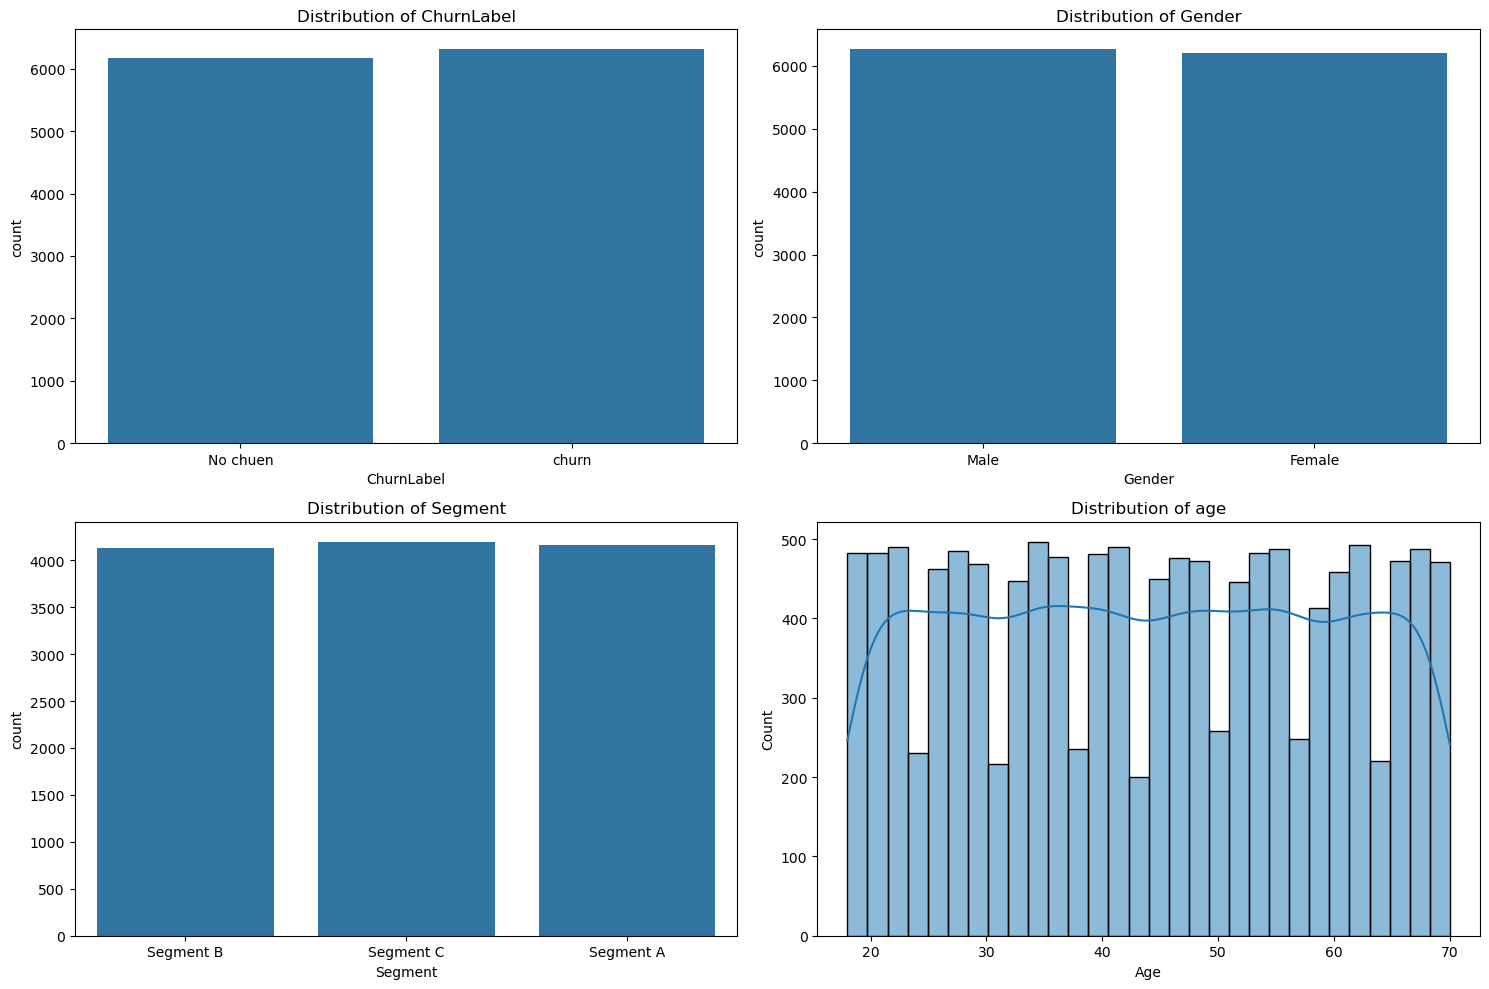

In [471]:
# Set up Figures and Axis
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))

# Plot the distribution of the targel variable, ChurnLabel
sns.countplot(x = 'ChurnLabel', data = df, ax = ax[0, 0])
ax[0,0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No chuen', 'churn'])

# Plot the distribution of the gender
sns.countplot(x = 'Gender', data = df, ax = ax[0,1])
ax[0,1].set_title('Distribution of Gender')

# Plot the distribution of segment
sns.countplot(x = 'Segment', data = df, ax = ax[1,0])
ax[1,0].set_title('Distribution of Segment')

# Plot age distribution 
sns.histplot(df['Age'], bins = 30, ax = ax[1,1], kde = True)
ax[1,1].set_title('Distribution of age')

plt.tight_layout()
plt.show()

In [472]:
df['ChurnLabel'].value_counts()


ChurnLabel
1    6314
0    6169
Name: count, dtype: int64

In [473]:
df['Gender'].value_counts()

Gender
Male      6269
Female    6214
Name: count, dtype: int64

In [474]:
df['Segment'].value_counts()

Segment
Segment C    4199
Segment A    4157
Segment B    4127
Name: count, dtype: int64

In [475]:
df['Age'].min()

18

In [476]:
df['Age'].max()

70

In [477]:
df['Age'].mean()

43.93006488824802

In [478]:
df['Age'].mode()

0    62
Name: Age, dtype: int64

#### Correlation Analysis: which column in the datset correlate most with 'ChurnLabel' column 

In [480]:
# correlation with ChurnLab
df.select_dtypes(include = np.number).corr()

,CustomerID,Age,NPS,ChurnLabel
CustomerID,1.000000,-0.002670,-0.002513,0.001530
Age,-0.002670,1.000000,0.000006,0.010273
NPS,-0.002513,0.000006,1.000000,-0.540703
ChurnLabel,0.001530,0.010273,-0.540703,1.000000


### Correlation Analysis

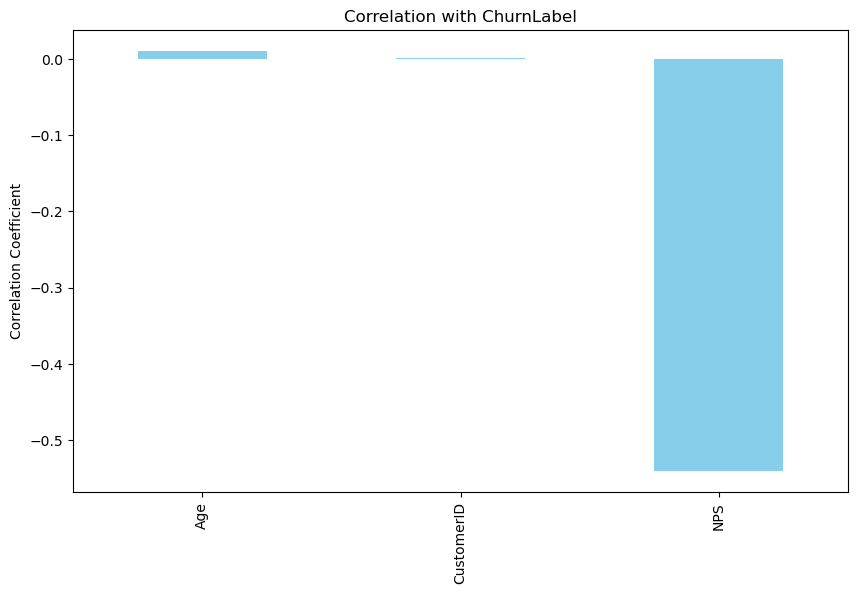

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [482]:
# correlation with ChurnLab
correlation = df.select_dtypes(include = np.number).corr()['ChurnLabel'].sort_values(ascending = False)

# Plot the correlation
plt.figure(figsize = (10, 6))
correlation.drop('ChurnLabel').plot(kind = 'bar', color = 'skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.show()

correlation

# Exploring nested columns 

In [484]:
# List out all the nested columns 
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'  
]
# print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns: 
    row = [col, df[col][0]]
    print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1 = w1, w2 = w2) )
    # print(f'\n| {row[0]:<{w1}} | {str(row[1]):<{w2}}') this is another way of formating the    


| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

#### Temporal Analysis: Here we take a look at how the churn rate changes over time, to see if there are any reocurring pattern 


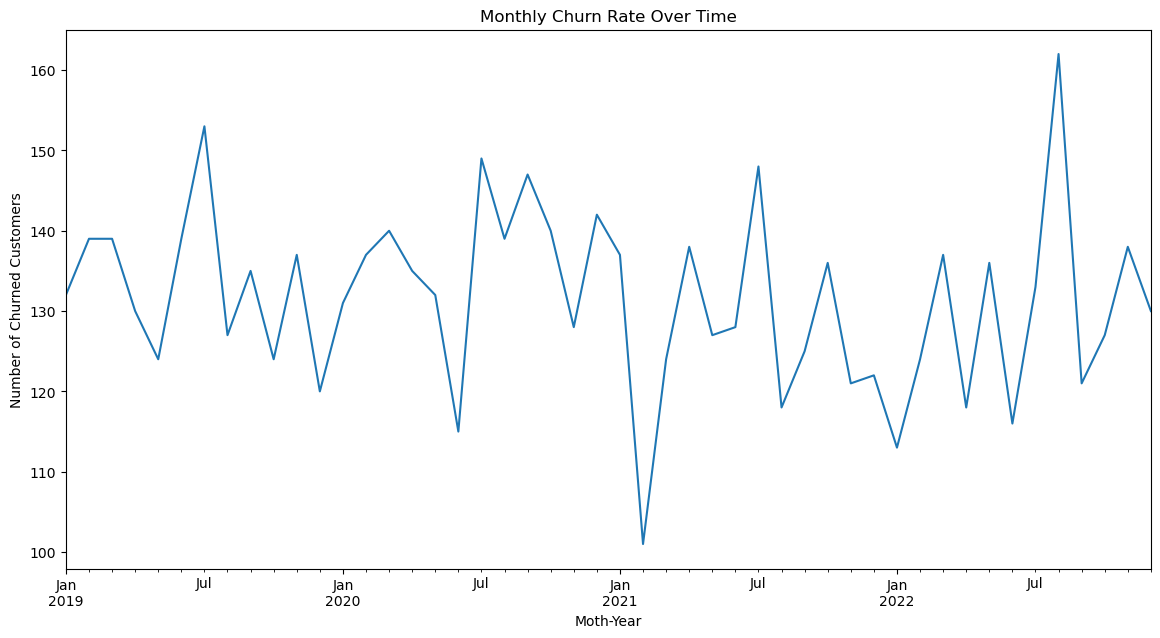

In [486]:
# Convert the Timestamp to datetime format so that it can be grouped
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract the  month_year from the 'Timestamp'
df['MonthYear'] = df['Timestamp'].dt.to_period('M')

# Group by monthYear and calculate the churn rates
monthly_churn_rate = df.groupby('MonthYear')['ChurnLabel'].sum()

# Plot the churn rate over time 
plt.figure(figsize = (14, 7))
monthly_churn_rate.plot() 
plt.title('Monthly Churn Rate Over Time')
plt.ylabel('Number of Churned Customers')
plt.xlabel('Moth-Year')
plt.show()

#### There is no reoccurring pattern which suggest that there is no particular period customers exist their subscription from the comapny

#### We also need to check if there are any pattern between customer feedback 'Rating' and 'ChurnLabel' 

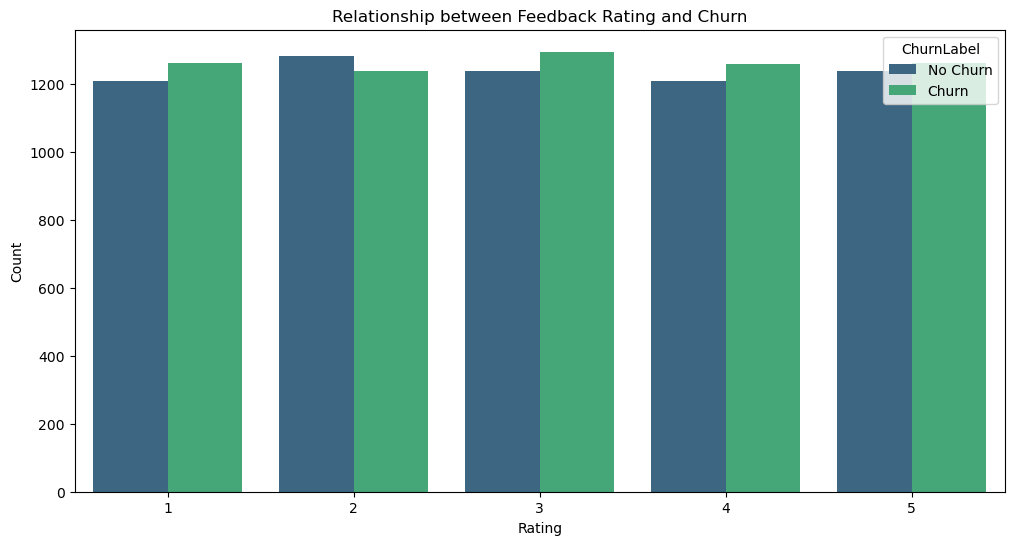

In [489]:
# Extracting rating from Feedback column and creating a new column for it
df['FeedbackRating'] = df['Feedback'].apply(lambda x: eval(x)['Rating'])

# Plot a relationship between feedback rating and churn 
plt.figure(figsize = (12, 6))
sns.countplot(x = 'FeedbackRating', data = df, hue = 'ChurnLabel', palette =  'viridis')
plt.title('Relationship between Feedback Rating and Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title = 'ChurnLabel', loc = 'upper right', labels = ['No Churn', 'Churn'])
plt.show()

#### From the visual, there seems to be no relationship between Feedback Rating and ChurnLabel

# Data Preprocessing and Feature Engineering

### Data Preprocessing and Feature Engineering

Here, we will do: 
- Create new features that may have predictive power,
- Convert categorical variables to numeric variables, using encoding techniques,
- Scale or normalise numeric varibles if necessary,
- Split the dataset into traing and testing subsets,
- Remove irrelevant features

We begin by converting the nested values from string formats to list/dictionaries using literal_eval function 

In [498]:
# List nested coumns 
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'  
]


# Apply the literal_eval function 
for feature in nested_columns:
    df[feature] = df[feature].apply(literal_eval)

#### More features will be extracted from the nested columns

In [503]:
import ast

# List of nested columns
nested_columns = [
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'  
]

# Apply the literal_eval function to each column in nested_columns
for feature in nested_columns:
    df[feature] = df[feature].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [508]:
# PurchaseHistory
df['PurchasedProducts'] = df['PurchaseHistory'].apply(
    lambda x: '|'.join(i['Product'] for i in x) if isinstance(x, list) else '')
df['PurchasedFrequency'] = df['PurchaseHistory'].apply(
    lambda x: sum(i.get('Frequency', 0) for i in x) if isinstance(x, list) else 0)
df['PurchasedValue'] = df['PurchaseHistory'].apply(
    lambda x: sum(i.get('Value', 0) for i in x) if isinstance(x, list) else 0)

# SubscriptionDetails
df['SubscriptionPlan'] = df['SubscriptionDetails'].apply(lambda x: x['Plan'])
df['SubscriptionStartDate'] = df['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
df['SubscriptionEnddate'] = df['SubscriptionDetails'].apply(lambda x: x['End_Date'])
df['SubscriptionDuration'] = (pd.to_datetime(df['SubscriptionEnddate']) - pd.to_datetime(df['SubscriptionStartDate'])).dt.days

# WebsiteUsage
df['WebsitePageViews'] = df['WebsiteUsage'].apply(lambda x: x['PageViews'])
df['WebsiteTimeSpent'] = df['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

# EngagementMetrics
df['EngagementMetricsLogins'] = df['EngagementMetrics'].apply(lambda x: x['Logins'])
df['EngagementMetricsFrequency'] = df['EngagementMetrics'].apply(lambda x: x['Frequency'])

# Feedback
df['FeedbackRating'] = df['Feedback'].apply(lambda x: x['Rating'])
df['FeedbackComment'] = df['Feedback'].apply(lambda x: x['Comment'])

# MarketingCommunication 
df['MarketingCommunicationNoOfEmails'] = df['MarketingCommunication'].apply(lambda x: len(x))
df['MarketingCommunicationOpenClickDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked']) \
        - pd.to_datetime(i['Email_Opened'])).days for i in x]))

df['MarketingCommunicationSentOpenDiff'] = df['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened']) \
        - pd.to_datetime(i['Email_Sent'])).days for i in x]))

# Special Extration from 3 Cloumns:
- ServiceInteractions 
- PaymentHistory
- ClickstreamData

Check for unique parameters/values in these columns.

In [510]:
# Get All Unique ServiceInteractions 'Types'
service_interactions_types = df['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interactions_types = service_interactions_types.to_list()
unique_service_interactions_types = []

for i in service_interactions_types:
    unique_service_interactions_types.extend(i)
unique_service_interactions_types = list(set(unique_service_interactions_types))
print('All unique_service_interactions_types', unique_service_interactions_types)

# Get All Unique PaymentHistory 'Method'
payment_history_methods = df['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []

for i in payment_history_methods:
    unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print('All unique_payment_history_methods', unique_payment_history_methods)

# Get All Unique ClickstreamData 'Action'
clickstream_data_actions = df['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []

for i in clickstream_data_actions:
    unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print('All unique_clickstream_data_actions', unique_clickstream_data_actions)


All unique_service_interactions_types ['Call', 'Chat', 'Email']
All unique_payment_history_methods ['Credit Card', 'Bank Transfer', 'PayPal']
All unique_clickstream_data_actions ['Search', 'Click', 'Add to Cart']


### Special Extration from 3 Cloumns(see the code abave)
- This helps in the extraction of the unique values of the categorical variables from each of the nested column unlike the normal column that is simple to extract. 
- The extracted unique values will be used to create different coumns for further analysis 

### From these 3 cloumns; we're going to encoding more

In [525]:
# ServiceInteractions
for usit in unique_service_interactions_types: 
    df[f'ServiceInteractions_{usit}'] = df['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

# PaymentHistory
df['PaymentHistoryNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
df['PaymentHistoryAvgNoOfLatePayments'] = df['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

# 'ClickstreamData'
for ucda in unique_clickstream_data_actions: 
    df[f'ClickstreamData_{ucda}'] = df['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == ucda]))

#### Below is the subset of the new dataset

In [528]:
df.head(3)

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear,FeedbackRating,PurchasedProducts,PurchasedFrequency,PurchasedValue,SubscriptionPlan,SubscriptionStartDate,SubscriptionEnddate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketingCommunicationNoOfEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Search,ClickstreamData_Click,ClickstreamData_Add to Cart
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01,1,"Frozen Cocktail Mixes|Printer, Copier & Fax Ma...",38,3994.72,Express,2020-06-08,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0,818.0,1,2,1,40,13.333333,12,4,8
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01,2,Watercraft Polishes|Baby Protective Wear|Footbags,4,2844.35,Pro,2021-07-21,2022-05-07,290,100,9,9,Weekly,Wish what bag cut life. Statement might opport...,9,88.0,110.0,5,4,10,10,3.333333,7,9,8
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04,4,"Vehicle Waxes, Polishes & Protectants|Pipe Cap...",14,1866.52,Essential,2019-10-05,2020-08-19,319,1,97,19,Monthly,Some Democrat guess but short. Whether behind ...,8,117.0,333.0,1,1,1,8,2.666667,7,3,2


In [529]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchasedFrequency',
       'PurchasedValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEnddate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_

#### Pick out some columns

In [531]:
# List of columns to select
selected_columns = [
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchasedFrequency',
    'PurchasedValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    'MarketingCommunicationNoOfEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationSentOpenDiff',
    'ServiceInteractions_Call', 
    'ServiceInteractions_Email',
    'ServiceInteractions_Chat',
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Add to Cart',
    'ClickstreamData_Search',
    'SubscriptionDuration'
]

# Select the specified columns from the DataFrame
df_ = df[selected_columns]

# Display the first few rows of the selected columns
df_.head()


,Age,Gender,NPS,ChurnLabel,PurchasedFrequency,PurchasedValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,MarketingCommunicationNoOfEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,Weekly,1,8,319.0,818.0,1,1,2,40,4,8,12,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,Weekly,2,9,88.0,110.0,5,10,4,10,9,8,7,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,Monthly,4,8,117.0,333.0,1,1,1,8,3,2,7,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,Daily,1,10,423.0,159.0,17,18,24,79,16,15,16,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,Weekly,3,7,96.0,193.0,4,5,1,2,9,17,4,580


#### Let's see all the columns we now 

In [533]:
df.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchasedProducts', 'PurchasedFrequency',
       'PurchasedValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEnddate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationNoOfEmails',
       'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_

In [534]:
df_.loc[0]

Age                                         31
Gender                                    Male
NPS                                          3
ChurnLabel                                   1
PurchasedFrequency                          38
PurchasedValue                         3994.72
SubscriptionPlan                       Express
WebsitePageViews                            49
WebsiteTimeSpent                            15
EngagementMetricsLogins                     19
EngagementMetricsFrequency              Weekly
FeedbackRating                               1
MarketingCommunicationNoOfEmails             8
MarketingCommunicationOpenClickDiff      319.0
MarketingCommunicationSentOpenDiff       818.0
ServiceInteractions_Call                     1
ServiceInteractions_Email                    1
ServiceInteractions_Chat                     2
PaymentHistoryNoOfLatePayments              40
ClickstreamData_Click                        4
ClickstreamData_Add to Cart                  8
ClickstreamDa

#### Let's check the number of unque values

In [536]:
print('Total length of dataset:', len(df_))

df_[['Gender', 'SubscriptionPlan', 'EngagementMetricsFrequency']].nunique()

Total length of dataset: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

#### Encoding the string parameters 

# Gender encoding
gender_map = {'Male': 0, 'Female': 1}

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}

# EngagementMetricsFrequency encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}

# Encode: # Apply the encoding maps to the DataFrame 
df_.loc[:, 'Gender'] = df_.loc[:, 'Gender'].map(gender_map)
df_.loc[:, 'SubscriptionPlan'] = df_.loc[:, 'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:, 'EngagementMetricsFrequency'] = df_.loc[:, 'EngagementMetricsFrequency'].map(engagement_frequency_map)
df_

In [538]:
# Display the first few rows of the DataFrame to check the original values
print(df_.head())

# Gender encoding
gender_map = {'Male': 0, 'Female': 1}
df_['Gender'] = df_['Gender'].map(gender_map)

# Check for unique values in the SubscriptionPlan column
print(df_['SubscriptionPlan'].unique())

# SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plans_map = {unique_subscription_plans[i]: i for i in range(len(unique_subscription_plans))}
df_['SubscriptionPlan'] = df_['SubscriptionPlan'].map(subscription_plans_map)

# Check for unique values in the EngagementMetricsFrequency column
print(df_['EngagementMetricsFrequency'].unique())

# EngagementMetricsFrequency encoding
unique_engagement_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_frequency_map = {unique_engagement_frequency[i]: i for i in range(len(unique_engagement_frequency))}
df_['EngagementMetricsFrequency'] = df_['EngagementMetricsFrequency'].map(engagement_frequency_map)


   Age  Gender  NPS  ChurnLabel  PurchasedFrequency  PurchasedValue  \
0   31    Male    3           1                  38         3994.72   
1   66  Female    6           0                   4         2844.35   
2   36  Female    3           0                  14         1866.52   
3   62  Female    1           1                  28         1378.64   
4   68  Female    3           0                  39         2425.05   

  SubscriptionPlan  WebsitePageViews  WebsiteTimeSpent  \
0          Express                49                15   
1              Pro               100                 9   
2        Essential                 1                97   
3            Smart                25                31   
4            Basic                77                51   

   EngagementMetricsLogins EngagementMetricsFrequency  FeedbackRating  \
0                       19                     Weekly               1   
1                        9                     Weekly               2   
2    

In [558]:
df_.head()

,Age,Gender,NPS,ChurnLabel,PurchasedFrequency,PurchasedValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,MarketingCommunicationNoOfEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Email,ServiceInteractions_Chat,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Add to Cart,ClickstreamData_Search,SubscriptionDuration
0,31,0,3,1,38,3994.72,0,49,15,19,0,1,8,319.0,818.0,1,1,2,40,4,8,12,871
1,66,1,6,0,4,2844.35,1,100,9,9,0,2,9,88.0,110.0,5,10,4,10,9,8,7,290
2,36,1,3,0,14,1866.52,2,1,97,19,1,4,8,117.0,333.0,1,1,1,8,3,2,7,319
3,62,1,1,1,28,1378.64,3,25,31,4,2,1,10,423.0,159.0,17,18,24,79,16,15,16,803
4,68,1,3,0,39,2425.05,4,77,51,12,0,3,7,96.0,193.0,4,5,1,2,9,17,4,580


#### Plot correlation matrix

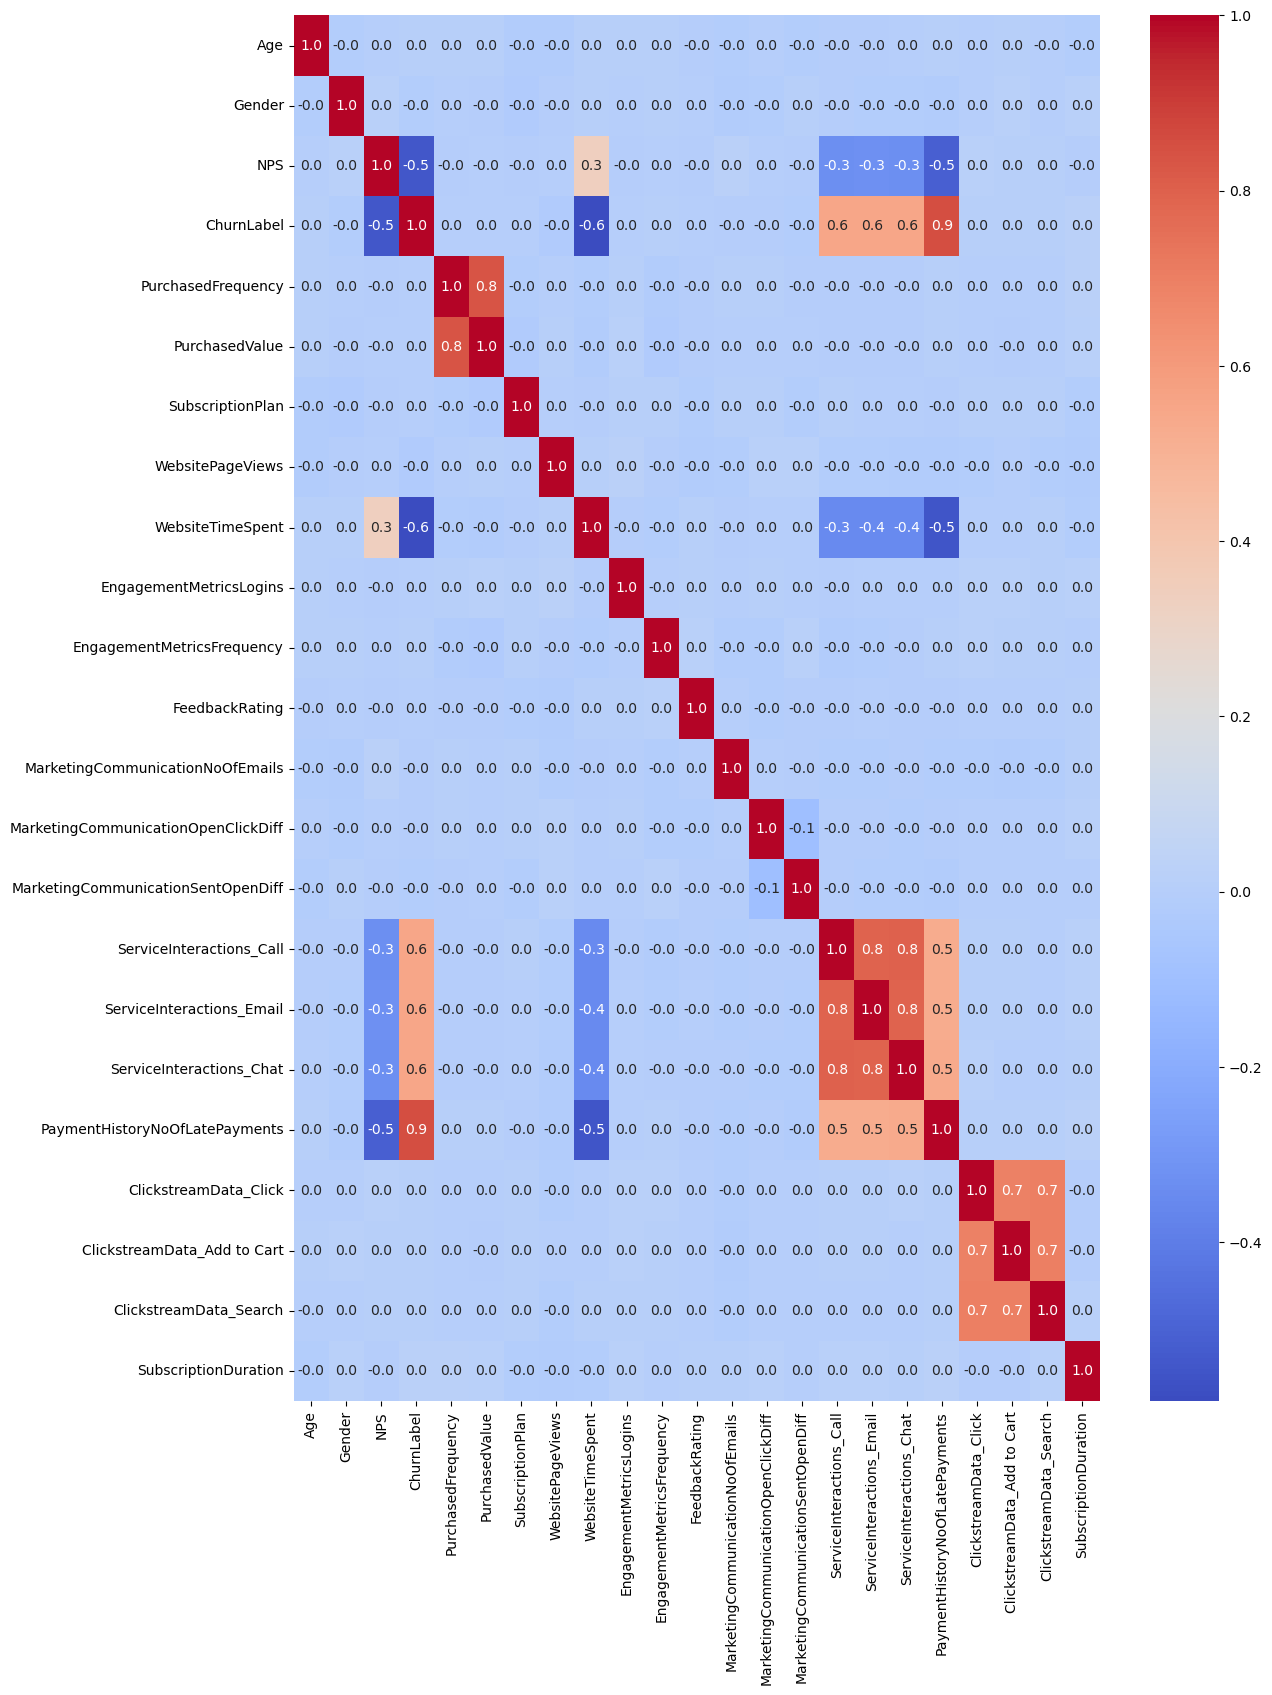

In [566]:
# Calculate the correlation matrix
df_corr = df_.corr()

# Create a heatmap with adjusted font size for annotations and figure size
fig, ax = plt.subplots(figsize=(13, 18))  # Increased figure size for better spacing
sns.heatmap(df_corr, annot=True, fmt='.1f', ax=ax, annot_kws={"size": 10}, cmap='coolwarm')
plt.show()

In [576]:
# set correlation limit

upper = 1
lower = .3

In [578]:
# Explicitly obtain correlated features

correlated_columns = {
    column: df_corr[(df_corr[column]> lower) & (df_corr[column]< upper)].index.tolist()
    for column in df_corr.columns
}

In [580]:
correlated_columns

{'Age': [],
 'Gender': [],
 'NPS': ['WebsiteTimeSpent'],
 'ChurnLabel': ['ServiceInteractions_Call',
  'ServiceInteractions_Email',
  'ServiceInteractions_Chat',
  'PaymentHistoryNoOfLatePayments'],
 'PurchasedFrequency': ['PurchasedValue'],
 'PurchasedValue': ['PurchasedFrequency'],
 'SubscriptionPlan': [],
 'WebsitePageViews': [],
 'WebsiteTimeSpent': ['NPS'],
 'EngagementMetricsLogins': [],
 'EngagementMetricsFrequency': [],
 'FeedbackRating': [],
 'MarketingCommunicationNoOfEmails': [],
 'MarketingCommunicationOpenClickDiff': [],
 'MarketingCommunicationSentOpenDiff': [],
 'ServiceInteractions_Call': ['ChurnLabel',
  'ServiceInteractions_Email',
  'ServiceInteractions_Chat',
  'PaymentHistoryNoOfLatePayments'],
 'ServiceInteractions_Email': ['ChurnLabel',
  'ServiceInteractions_Call',
  'ServiceInteractions_Chat',
  'PaymentHistoryNoOfLatePayments'],
 'ServiceInteractions_Chat': ['ChurnLabel',
  'ServiceInteractions_Call',
  'ServiceInteractions_Email',
  'PaymentHistoryNoOfLatePay

#### Split data into train, test and validation sets

In [597]:
x = df_.drop(columns = ['ChurnLabel'])
y = df_['ChurnLabel']

x_train, x_other, y_train, y_other = train_test_split(x, y, train_size = 0.8, random_state = 42)
x_test, x_val, y_test, y_val = train_test_split(x_other, y_other, test_size = 0.3, random_state = 42)

In [613]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_val = ss.transform(x_val)
x_test = ss.transform(x_test)

#### Modelling and Evaluation

#### Modelling 
- LogisticRegression 
- DecisionTreeClassifier

#### Evalustion Metrics
- Accuracy score
- Precision Score
- Recall Score
- F1 score

In [636]:
def evaluate(x, y, model, subset = ''):
    y_pred = model.predict(x)


    print(f'{subset} Accuracy Score: {accuracy_score (y_pred, y)}')
    print(f'{subset} Precision Score: {precision_score (y_pred, y)}')
    print(f'{subset} Recall Score: {recall_score (y_pred, y)}')
    print(f'{subset} F1 Score: {f1_score (y_pred, y)}')  

### Modelling with Logistic Regression

In [651]:
# Build the model
lr = LogisticRegression()
lr.fit(x_train, y_train)

# Evaluate the model on train and validation subset
print('Logistic Regression Model')
print('...................................')
evaluate(x_train, y_train, lr, 'Train')
print('...................................')
print('Validation ........................')
evaluate(x_val, y_val, lr, 'Validation')

Logistic Regression Model
...................................
Train Accuracy Score: 0.9709593430803124
Train Precision Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962
...................................
Validation ........................
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


### Modelling with Deciosion Tree

In [678]:
# Building the model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Evaluate on train and validation subsets
print('Decision Tree Model')
print('.........................................')
evaluate(x_train, y_train, dt, subset = 'Train')
print('............................................')
print('Validation .................................')
evaluate(x_val, y_val, dt, subset = 'Validation')

Decision Tree Model
.........................................
Train Accuracy Score: 1.0
Train Precision Score: 1.0
Train Recall Score: 1.0
Train F1 Score: 1.0
............................................
Validation .................................
Validation Accuracy Score: 0.9386666666666666
Validation Precision Score: 0.9449035812672176
Validation Recall Score: 0.9295392953929539
Validation F1 Score: 0.9371584699453552


### The output suggest that the decisio tree model is overfitting.  
###  max_depth was inputed to prevent overfitting 

### In the context of a DecisionTreeClassifier, the max_depth parameter is a hyperparameter that determines the maximum depth of the tree. The depth of the tree is the length of the longest path from the root node to a leaf node. Setting max_depth helps in controlling the complexity of the tree and can be crucial for preventing overfitting. 

### Reducing Overfitting in Decision Tree Model

In [701]:
# Building the model
dt = DecisionTreeClassifier(max_depth = 5)#  max_depth = 5 was used to reduce overfitting 
dt.fit(x_train, y_train)

# Evaluate on train and validation subsets
print('Decision Tree Model')
print('.........................................')
evaluate(x_train, y_train, dt, subset = 'Train')
print('............................................')
print('Validation .................................')
evaluate(x_val, y_val, dt, subset = 'Validation')

Decision Tree Model
.........................................
Train Accuracy Score: 0.9768676146605247
Train Precision Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335303
............................................
Validation .................................
Validation Accuracy Score: 0.968
Validation Precision Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


### Evaluation on the Test Set 

In [711]:
print('Logistic Regression...........................')
evaluate(x_test, y_test, lr, 'Losgistic Regression Test')
print('..................................................')
print('Decision Tree.....................................')
evaluate(x_test, y_test, dt, 'Decision Tree Classifier')

Logistic Regression...........................
Losgistic Regression Test Accuracy Score: 0.9690898683457355
Losgistic Regression Test Precision Score: 0.9644495412844036
Losgistic Regression Test Recall Score: 0.9733796296296297
Losgistic Regression Test F1 Score: 0.9688940092165899
..................................................
Decision Tree.....................................
Decision Tree Classifier Accuracy Score: 0.9730967372638809
Decision Tree Classifier Precision Score: 0.9724770642201835
Decision Tree Classifier Recall Score: 0.9735935706084959
Decision Tree Classifier F1 Score: 0.9730349971313826


### Plot the Confusion Matrix

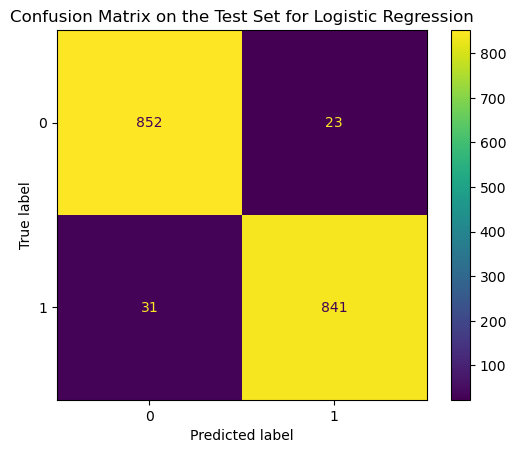

In [721]:
lr_y_pred = lr.predict(x_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = logistic_regression_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on the Test Set for Logistic Regression')
plt.show()

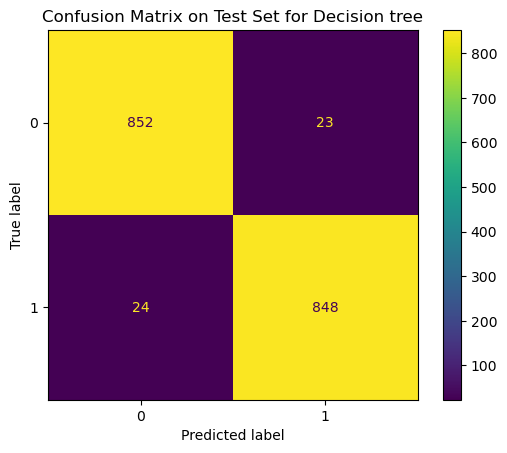

In [737]:
dt_y_pred = dt.predict(x_test)
decision_tree_confusion_matrix = confusion_matrix(y_test, dt_y_pred)

display = ConfusionMatrixDisplay(confusion_matrix = decision_tree_confusion_matrix)
display.plot()
plt.title('Confusion Matrix on Test Set for Decision tree')
plt.show()




## Interpretation of Models and Professional Recommendation
### Logistic Regression Model
- Test Accuracy Score: 0.969: The model correctly predicts 96.9% of the test data.
- Test Precision Score: 0.964: When the model predicts a positive class, it is correct 96.4% of the time.
- Test Recall Score: 0.973: The model identifies 97.3% of the actual positive cases.
- Test F1 Score: 0.969: The harmonic mean of precision and recall is 96.9%.
### Confusion Matrix for Logistic Regression:

- Churn: The model correctly predicts 841 customers who churned and incorrectly predicts 31 customers.
- Not Churn: The model correctly predicts 852 customers who did not churn and incorrectly predicts 32 customers.
### Decision Tree Model
- Test Accuracy Score: 0.973: The model correctly predicts 97.3% of the test data.
- Test Precision Score: 0.972: The model's positive predictions are 97.2% correct on the test data.
- Test Recall Score: 0.974: The model identifies 97.4% of the actual positive cases in the test data.
- Test F1 Score: 0.973: The harmonic mean of precision and recall is 97.3% in the test data.
### Confusion Matrix for Decision Tree:

- Churn: The model correctly predicts 848 customers who churned and incorrectly predicts 24 customers.
- Not Churn: The model correctly predicts 852 customers who did not churn and incorrectly predicts 23 customers.
### Key Features Influencing Churn
- Service Interactions (Call, Email, Chat): The number of service interactions a customer has had is crucial in predicting churn.
- Payment History (Number of Late Payments): The frequency of late payments is a significant indicator.
- Website Time Spent: The amount of time a customer spends on the company's website.
- Net Promoter Score (NPS): The likelihood of a customer recommending the company to others.
### Professional Recommendation
Based on the performance metrics and confusion matrices, both models perform exceptionally well. However, the Decision Tree model shows slightly better accuracy, precision, recall, and F1 scores on the test set.

- Decision Tree Model is recommended due to its slightly superior performance metrics and ability to capture complex decision boundaries with interpretability. It is less prone to overfitting due to the max_depth constraint, making it a robust choice for deployment.
- Logistic Regression Model remains a strong alternative, offering high performance with the added benefit of simplicity and ease of interpretation. It can be considered in scenarios where model simplicity and ease of communication to stakeholders are paramount.

### Conclusion
Both models are highly effective, but the Decision Tree model is recommended for deployment due to its slightly better performance. Continuous monitoring and evaluation of the model's performance should be conducted to ensure it remains accurate over time.